# Assignment-01

## 1. Implementation of the Apri-ori and the rule extractor al-gorithms (8 Pts.)


In [11]:
# your code here 

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
def plot_rules_scatter(df_rules: pd.DataFrame, title: str):
    if df_rules.empty:
        return
    plt.figure()
    plt.scatter(df_rules["confidence"], df_rules["support"], s=df_rules["lift"]*30, alpha=0.6)
    plt.xlabel("Confidence")
    plt.ylabel("Support")
    plt.title(title)
    plt.grid(True, linestyle=":")
    plt.show()

## 2. Mining frequent itemsets and association rules in a movie rating dataset (22Pts.)

### 2.1 Building the transactionaldatabases (8 pts.)

In [136]:
def create_transaction():
    with open('MovieLensDatasets/ratings.dat', 'r') as file:
        data = file.readlines()
        positive_transactions = {}
        negative_transactions = {}
        for row in data:
            user_id, movie_id, rating, _ = map(int, row.strip().split('::'))
            if user_id not in positive_transactions:
                positive_transactions[user_id] = []
            if user_id not in negative_transactions:
                negative_transactions[user_id] = []
            if rating >= 4:
                positive_transactions[user_id].append(movie_id)
            elif rating <= 2:
                negative_transactions[user_id].append(movie_id)
    return positive_transactions, negative_transactions

positive_transactions, negative_transactions = create_transaction()

### 2.2 Getting first results (6 pts.)

In [137]:
def create_movie_name_dict():
    with open('MovieLensDatasets/movies.dat', 'r', encoding='latin-1') as file:
        movie_names = {}
        for row in file:
            parts = row.rstrip('\n').split('::', 2)
            movie_id = int(parts[0])
            name = parts[1]
            movie_names[movie_id] = name
    return movie_names

movie_name_dict = create_movie_name_dict()
print(movie_name_dict[positive_transactions[1][1]])


Erin Brockovich (2000)


In [138]:

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

positive_datasets = [items for items in positive_transactions.values() if len(items) > 0]
te = TransactionEncoder()
te_ary = te.fit(positive_datasets).transform(positive_datasets)
df = pd.DataFrame(te_ary, columns=te.columns_)
# Generate frequent itemsets

min_support = 0.5
step = 0.1
min_floor = 0.01

while min_support >= min_floor:
    positive_frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    max_size = positive_frequent_itemsets['itemsets'].apply(lambda x: len(x)).max() if not positive_frequent_itemsets.empty else 0
    print(f"min_support={min_support:.3f} -> max_itemset_size={max_size}, count={len(positive_frequent_itemsets)}")
    if max_size >= 3:
        print(f"Stopping: reached itemsets of size >= 3 at min_support={min_support:.3f}")
        break
    min_support = round(min_support - step, 3)
else:
    print(f"No 3-itemsets found down to min_support={min_floor}")





min_support=0.500 -> max_itemset_size=0, count=0
min_support=0.400 -> max_itemset_size=1, count=3
min_support=0.300 -> max_itemset_size=2, count=20
min_support=0.200 -> max_itemset_size=3, count=108
Stopping: reached itemsets of size >= 3 at min_support=0.200



Association Rules Count: 57

Sample Association Rules:
                                           antecedents  \
52  (Star Wars: Episode V - The Empire Strikes Bac...   
53  (Star Wars: Episode VI - Return of the Jedi (1...   
54  (Star Wars: Episode V - The Empire Strikes Bac...   
55  (Star Wars: Episode IV - A New Hope (1977), Ma...   
56  (Star Wars: Episode V - The Empire Strikes Bac...   

                                          consequents  antecedent support  \
52  (Star Wars: Episode VI - Return of the Jedi (1...            0.324611   
53  (Star Wars: Episode V - The Empire Strikes Bac...            0.352269   
54        (Star Wars: Episode IV - A New Hope (1977))            0.242133   
55  (Star Wars: Episode V - The Empire Strikes Bac...            0.245114   
56                               (Matrix, The (1999))            0.324611   

    consequent support   support  confidence      lift  representativity  \
52            0.352269  0.235508    0.725510  2.059535       

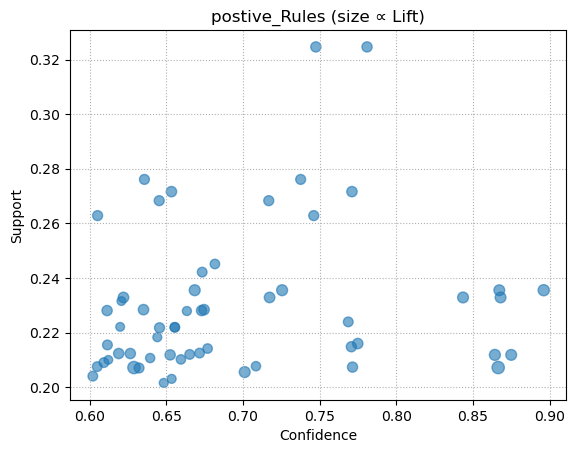

In [139]:
positive_rules = association_rules(positive_frequent_itemsets, metric="confidence", min_threshold=0.6)
positive_rules['antecedents'] = positive_rules['antecedents'].apply(lambda x: frozenset([movie_name_dict[item] for item in x]))
positive_rules['consequents'] = positive_rules['consequents'].apply(lambda x: frozenset([movie_name_dict[item] for item in x]))
print("\nAssociation Rules Count:", len(positive_rules))
print("\nSample Association Rules:\n", positive_rules[-5:])
plot_rules_scatter(positive_rules, "postive_Rules (size ∝ Lift)")

In [140]:
negative_datasets = [items for items in negative_transactions.values() if len(items) > 0]
te = TransactionEncoder()
te_ary = te.fit(negative_datasets).transform(negative_datasets)
df = pd.DataFrame(te_ary, columns=te.columns_)
# Generate frequent itemsets

min_support =0.1
step = 0.01
min_floor = 0.001

while min_support >= min_floor:
    negative_frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    max_size = negative_frequent_itemsets['itemsets'].apply(lambda x: len(x)).max() if not negative_frequent_itemsets.empty else 0
    print(f"min_support={min_support:.3f} -> max_itemset_size={max_size}, count={len(negative_frequent_itemsets)}")
    if max_size >= 3:
        print(f"Stopping: reached itemsets of size >= 3 at min_support={min_support:.3f}")
        break
    min_support = round(min_support - step, 3)
else:
    print(f"No 3-itemsets found down to min_support={min_floor}")




min_support=0.100 -> max_itemset_size=0, count=0
min_support=0.090 -> max_itemset_size=1, count=1
min_support=0.080 -> max_itemset_size=1, count=2
min_support=0.070 -> max_itemset_size=1, count=3
min_support=0.060 -> max_itemset_size=1, count=9
min_support=0.050 -> max_itemset_size=1, count=26
min_support=0.040 -> max_itemset_size=1, count=58
min_support=0.030 -> max_itemset_size=2, count=150
min_support=0.020 -> max_itemset_size=2, count=397
min_support=0.010 -> max_itemset_size=3, count=2221
Stopping: reached itemsets of size >= 3 at min_support=0.010



Association Rules Count:
 40

Sample Association Rules (last 5):

                                                                                  antecedents                                        consequents  antecedent support  consequent support  support  confidence      lift  representativity  leverage  conviction  zhangs_metric  jaccard  certainty  kulczynski
     (Police Academy 6: City Under Siege (1989), Police Academy 4: Citizens on Patrol (1987)) (Police Academy 5: Assignment: Miami Beach (1988))            0.012980            0.019730 0.011250    0.866667 43.926316               1.0  0.010993    7.352025       0.990086 0.524194   0.863983    0.718421
(Police Academy 5: Assignment: Miami Beach (1988), Police Academy 6: City Under Siege (1989))      (Police Academy 4: Citizens on Patrol (1987))            0.014711            0.021288 0.011250    0.764706 35.922525               1.0  0.010936    4.159528       0.986677 0.454545   0.759588    0.646581
                        

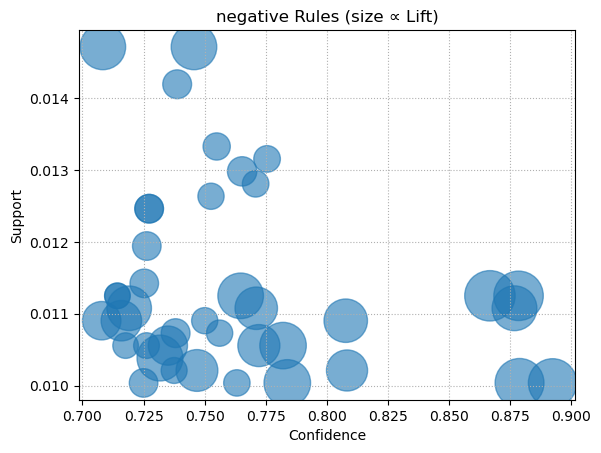

In [141]:
negative_rules = association_rules(negative_frequent_itemsets, metric="confidence", min_threshold=0.7)
negative_rules['antecedents'] = negative_rules['antecedents'].apply(lambda x: frozenset([movie_name_dict[item] for item in x]))
negative_rules['consequents'] = negative_rules['consequents'].apply(lambda x: frozenset([movie_name_dict[item] for item in x]))
print("\nAssociation Rules Count:\n", len(negative_rules))
print("\nSample Association Rules (last 5):\n")
print(negative_rules.tail(5).to_string(index=False))
plot_rules_scatter(negative_rules, "negative Rules (size ∝ Lift)")

### 2.3 A deeper look (8 Pts.)

In [142]:
# your code here